# Import dependencies

In [59]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import glob

# Load datasets

In [26]:
report_periods = pd.read_csv('../data/report-periods.csv')

# Get all stock codes that has True value on  "12M 2023" column
stock_codes = report_periods[report_periods['12M 2023'] == True]['Kode'].tolist()

In [27]:
# Remove from stock codes
stock_codes.remove('PURE') # This stock has a lot of NaN values

In [28]:
# Variable to be extracted from the CSV files (column)
variables = [
    # Profitability & Efficiency (10)
    'Return on Equity (Annual)',
    'Return on Assets (Annual)',
    'Return on Capital Employed (Annual)',
    'EPS (Annual)',
    'EBITDA (Annual)',
    'Asset Turnover (Annual)',
    'Fixed Assets Turnover (Annual)',
    'Inventory Turnover (Annual)',
    'Receivables Turnover (Annual)',
    'Working Capital Turnover (Annual)',
    
    # Market Valuation (5)
    'PE Ratio (Annual)',
    'Price to Book Value (Annual)',
    'Price to Tang. Book Value (Annual)',
    'Price to Sales (Annual)',
    'Book Value Per Share (Annual)',
    
    # Cash Flow (3)
    'Operating Cash Flow (Annual)',
    'Free cash flow (Annual)',
    'Free cash flow per share (Annual)',
    
    # Liquidity (2)
    'Current Ratio (Annual)',
    'Quick Ratio (Annual)',
    
    # Solvency & Leverage (8)
    'Debt to Equity Ratio (Annual)',
    'Total Debt/Total Assets (Annual)',
    # 'LT Debt/Equity (Annual)', # This variable is equal in all rows, so it is not useful
    # 'LT Debt/Total Assets (Annual)', # This variable is equal in all rows, so it is not useful
    'Net Debt/Total Equity (Annual)',
    'Total Liabilities/Equity (Annual)',
    'Financial Leverage (Annual)',
    'Interest Coverage (Annual)',
    
    # Cash Conversion Cycle (4)
    'Days Sales Outstanding (Annual)',
    'Days Inventory (Annual)',
    'Payables Period (Annual)',
    'Cash Conversion Cycle (Annual)'
]

# Periods to be extracted from the CSV files (row)
periods = ['12M 2023']

In [47]:
financial_reports = pd.DataFrame()

for stock_code in stock_codes:
    print(f'Processing stock code: {stock_code}')

    financials_path = os.path.join(
        '..', 'data', 'financials', stock_code, 'annual', '*.csv'
    )

    financials = glob.glob(financials_path)

    financial_report = pd.DataFrame(columns=['Kode'])
    # Fill first row with stock code
    financial_report.loc[0, 'Kode'] = stock_code

    for financial in financials:
        # Read the stock financials from CSV file
        df = pd.read_csv(financial, index_col=None, header=0)
        # Get the specific row based on the periods
        df = df[df['Period'].isin(periods)].reset_index(drop=True)

        financial_report = pd.concat([financial_report, df], axis=1)

    # Select only the variables of interest
    financial_report = financial_report[['Kode'] + variables]

    financial_reports = pd.concat([financial_reports, financial_report], ignore_index=True)

financial_reports.head()

Processing stock code: AALI
Processing stock code: ABBA
Processing stock code: ABDA
Processing stock code: ABMM
Processing stock code: ACES
Processing stock code: ACST
Processing stock code: ADES
Processing stock code: ADHI
Processing stock code: ADMF
Processing stock code: ADMG
Processing stock code: ADRO
Processing stock code: AGII
Processing stock code: AGRO
Processing stock code: AGRS
Processing stock code: AHAP
Processing stock code: AIMS
Processing stock code: AISA
Processing stock code: AKKU
Processing stock code: AKPI
Processing stock code: AKRA
Processing stock code: AKSI
Processing stock code: ALDO
Processing stock code: ALKA
Processing stock code: ALMI
Processing stock code: ALTO
Processing stock code: AMAG
Processing stock code: AMFG
Processing stock code: AMIN
Processing stock code: AMRT
Processing stock code: ANJT
Processing stock code: ANTM
Processing stock code: APEX
Processing stock code: APIC
Processing stock code: APII
Processing stock code: APLI
Processing stock cod

,Kode,Return on Equity (Annual),Return on Assets (Annual),Return on Capital Employed (Annual),EPS (Annual),EBITDA (Annual),Asset Turnover (Annual),Fixed Assets Turnover (Annual),Inventory Turnover (Annual),Receivables Turnover (Annual),...,Debt to Equity Ratio (Annual),Total Debt/Total Assets (Annual),Net Debt/Total Equity (Annual),Total Liabilities/Equity (Annual),Financial Leverage (Annual),Interest Coverage (Annual),Days Sales Outstanding (Annual),Days Inventory (Annual),Payables Period (Annual),Cash Conversion Cycle (Annual)
0,AALI,4.80%,3.66%,4.80%,548.61,"2,614.63 B",0.71,2.29,5.85,27.24,...,0.18,0.14,0.09,0.29,1.31,4.66,13.40,62.44,20.98,54.86
1,ABBA,-226.34%,-16.12%,-37.63%,-11.10,(39.96 B),0.61,9.06,32.21,4.59,...,0.89,0.06,-0.74,19.52,14.04,-12.40,79.44,11.33,143.95,-53.18
2,ABDA,5.46%,3.17%,-3.51%,136.24,(79.79 B),0.25,9.26,NaN,NaN,...,0.00,0.00,0.00,0.72,0.00,NaN,NaN,NaN,NaN,NaN
3,ABMM,37.62%,13.24%,20.80%,1601.26,"8,358.98 B",0.71,2.27,19.87,5.16,...,1.37,0.48,1.12,1.84,2.84,2.88,70.73,18.37,81.23,7.87
4,ACES,12.53%,9.88%,14.80%,44.92,"1,476.23 B",1.01,17.93,1.43,53.64,...,0.01,0.01,-0.36,0.26,1.27,24.07,6.81,255.83,12.49,250.15


In [48]:
clean_financial_reports = financial_reports.copy().dropna(axis=1)

In [51]:
# Remove % from values on 'Return on Equity (Annual)', 'Return on Assets (Annual)', and
# 'Return on Capital Employed (Annual)', and convert columns to float
for col in ['Return on Equity (Annual)', 'Return on Assets (Annual)', 'Return on Capital Employed (Annual)']:
    clean_financial_reports[col] = clean_financial_reports[col].str.replace('%', '').astype(float)

In [52]:
# Convert 'Operating Cash Flow (Annual)' from string to float, remove 'B' suffix, and convert value that contained inside () into negative value
clean_financial_reports['Operating Cash Flow (Annual)'] = clean_financial_reports['Operating Cash Flow (Annual)'].str.replace(
    ' B', '').str.replace('(', '-').str.replace(')', '').str.replace(',', '.').astype(float)

In [53]:
clean_financial_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Kode                                 911 non-null    object 
 1   Return on Equity (Annual)            911 non-null    float64
 2   Return on Assets (Annual)            911 non-null    float64
 3   Return on Capital Employed (Annual)  911 non-null    float64
 4   EPS (Annual)                         911 non-null    float64
 5   PE Ratio (Annual)                    911 non-null    float64
 6   Price to Book Value (Annual)         911 non-null    float64
 7   Price to Tang. Book Value (Annual)   911 non-null    float64
 8   Price to Sales (Annual)              911 non-null    float64
 9   Book Value Per Share (Annual)        911 non-null    float64
 10  Operating Cash Flow (Annual)         911 non-null    float64
 11  Free cash flow per share (Annual

In [54]:
clean_financial_reports.describe()

,Return on Equity (Annual),Return on Assets (Annual),Return on Capital Employed (Annual),EPS (Annual),PE Ratio (Annual),Price to Book Value (Annual),Price to Tang. Book Value (Annual),Price to Sales (Annual),Book Value Per Share (Annual),Operating Cash Flow (Annual),Free cash flow per share (Annual),Current Ratio (Annual),Quick Ratio (Annual),Debt to Equity Ratio (Annual),Total Debt/Total Assets (Annual),Net Debt/Total Equity (Annual),Total Liabilities/Equity (Annual),Financial Leverage (Annual)
count,911.000000,911.000000,911.000000,9.110000e+02,911.000000,911.000000,911.000000,911.000000,9.110000e+02,911.00000,9.110000e+02,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,4.043831,0.495488,4.136872,2.981733e+05,68.643897,2.976718,1.710285,31.869089,9.275811e+05,78.89491,-7.544911e+05,3.824995,2.640450,0.526290,0.296597,0.323568,1.624402,2.255401
std,104.885911,37.160282,73.324562,8.649868e+06,409.827206,13.166514,41.401695,535.370561,2.455102e+07,225.49707,2.311438e+07,11.644000,8.510056,2.019231,2.179500,1.792395,7.876753,7.907824
min,-1954.830000,-949.820000,-1557.410000,-1.982651e+04,-1153.330000,-12.230000,-1178.570000,-6.760000,-5.908810e+03,-938.00000,-6.976234e+08,0.000000,0.000000,-8.050000,0.000000,-7.550000,-21.950000,-20.590000
25%,0.290000,0.050000,0.685000,7.500000e-02,0.000000,0.475000,0.470000,0.430000,6.918500e+01,-2.02150,-1.255000e+01,0.770000,0.405000,0.000000,0.000000,-0.080000,0.260000,1.130000
50%,5.330000,2.200000,6.030000,9.320000e+00,8.980000,1.010000,1.020000,1.170000,1.907600e+02,6.00000,6.500000e-01,1.600000,1.020000,0.140000,0.110000,0.020000,0.700000,1.540000
75%,13.095000,6.580000,13.680000,5.571500e+01,27.005000,2.135000,2.170000,3.190000,6.634550e+02,98.50000,3.833000e+01,3.035000,2.175000,0.550000,0.270000,0.395000,1.550000,2.270000
max,2197.150000,94.360000,162.560000,2.610482e+08,7016.130000,271.440000,271.440000,15485.720000,7.393310e+08,989.00000,4.698053e+06,169.900000,158.160000,42.470000,55.720000,38.830000,190.310000,191.310000


In [55]:
clean_financial_reports.isnull().sum()

Kode                                   0
Return on Equity (Annual)              0
Return on Assets (Annual)              0
Return on Capital Employed (Annual)    0
EPS (Annual)                           0
PE Ratio (Annual)                      0
Price to Book Value (Annual)           0
Price to Tang. Book Value (Annual)     0
Price to Sales (Annual)                0
Book Value Per Share (Annual)          0
Operating Cash Flow (Annual)           0
Free cash flow per share (Annual)      0
Current Ratio (Annual)                 0
Quick Ratio (Annual)                   0
Debt to Equity Ratio (Annual)          0
Total Debt/Total Assets (Annual)       0
Net Debt/Total Equity (Annual)         0
Total Liabilities/Equity (Annual)      0
Financial Leverage (Annual)            0
dtype: int64

In [58]:
def find_optimal_clusters(data, max_k=10):
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

# Run elbow method to find the optimal number of clusters
inertia = find_optimal_clusters(clean_financial_reports.select_dtypes(include=['float64', 'int64']))

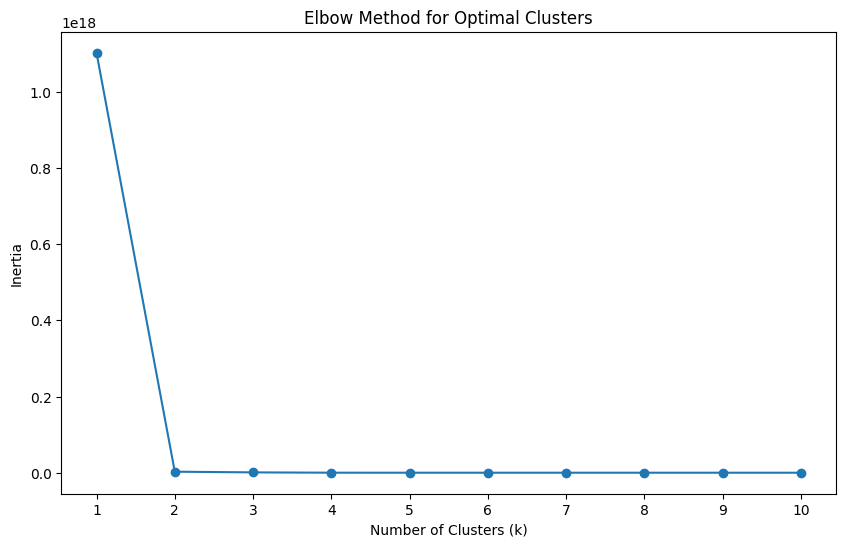

In [60]:
# Plot a graph to visualize the inertia
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(inertia) + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, len(inertia) + 1))
plt.show()

In [61]:
kmeans = KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(clean_financial_reports.select_dtypes(include=['float64', 'int64']))